In [1]:
import numpy as np                                     
import matplotlib.pyplot as plt                      
import seaborn as sns                                
from iminuit import Minuit                      
import sys             
from sympy import *                           
from scipy import stats
from scipy.special import binom as binomcoef
from scipy.special import expit, gamma
from scipy.integrate import trapz, simpson
import scipy.interpolate as scint
import pandas as pd
import os
import nestle
from importlib import reload

plt.style.use("../KD_style.mplstyle")

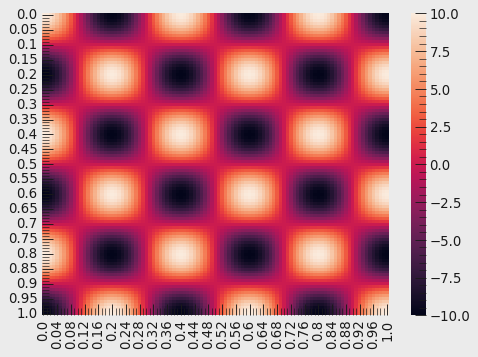

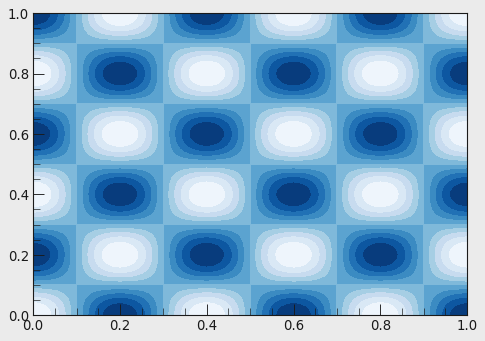

In [74]:

def llh(theta):
    return 10* np.cos(theta[0]*np.pi*5) * np.cos(theta[1]*np.pi*5)

t1_range = np.round(np.linspace(0, 1, 101),3)
t2_range = np.round(np.linspace(0, 1, 101),3)
mesh = np.meshgrid(t1_range, t2_range)
xx, yy = mesh
Z = llh(np.array([xx, yy]))
data_df = pd.DataFrame(Z, columns = t1_range, index = t2_range)
sns.heatmap(data_df)
plt.show()

plt.contourf(xx, yy, Z, 12, cmap=plt.cm.Blues_r)
plt.grid(False)

[2.92977428e-10 3.70682206e-10 3.80460111e-10 ... 1.64413539e-03
 1.75432179e-03 1.61703455e-03]


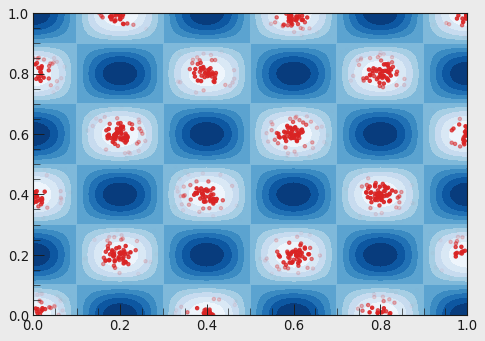

In [73]:
def prior_transform(x):
    return x

result = nestle.sample(llh, prior_transform, 2, npoints = 200, method = "multi", update_interval=20)

samples = result.samples.T
print(result.weights)
plt.contourf(xx, yy, Z, 12, cmap=plt.cm.Blues_r)
plt.scatter(samples[0], samples[1], alpha=result.weights/np.max(result.weights))
plt.grid(False)

